In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def load_images_from_folders(*folders):   #function for extracting images from multiple folders and labelling them
    all_images = []
    all_labels = []
    for i, folder in enumerate(folders):
        labels = []
        images = []
        for image in os.listdir(folder):
            img_path = os.path.join(folder, image)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (250, 250))
            images.append(img)
        labels.extend(np.full(len(images), i))
        all_images.extend(images)
        all_labels.extend(labels)
    return np.array(all_images), np.array(all_labels)

In [ ]:
images, labels = load_images_from_folders(r"dataset\anger",
                                          r"dataset\happiness",
                                          r"dataset\neutrality",
                                          r"dataset\sadness")
                                          

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([1000, 1000, 1000, 1000], dtype=int64))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0 
X_test = X_test / 255.0

<h4>START OF TRAINING</h4>

In [ ]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(data_augmentation.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.7447 - loss: 0.6546 - val_accuracy: 0.7500 - val_loss: 0.3333
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7558 - loss: 0.6088 - val_accuracy: 0.7500 - val_loss: 0.5501
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7686 - loss: 0.5732 - val_accuracy: 0.7500 - val_loss: 0.7621
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7628 - loss: 0.5801 - val_accuracy: 0.7500 - val_loss: 0.7159
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.7859 - loss: 0.5493 - val_accuracy: 0.7500 - val_loss: 0.2667
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.7793 - loss: 0.5800 - val_accuracy: 0.7500 - val_loss: 0.9328
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.7774 - loss: 0.5436 - val_accuracy: 0.7500 - val_loss: 0.3068
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.8056 - loss: 0.5181 - val_accuracy: 0.750

In [ ]:
model.save('emotion_based_multiclassification_model_4.keras')

<h4>END OF TRAINING</h4>
<br>
<br>
<h4>EVALUATING & FINE TUNNING<h4>

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('emotion_based_multiclassification_final.keras')

In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 335ms/step - accuracy: 0.8934 - loss: 0.2996
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.8782 - loss: 0.3630


[0.3594694435596466, 0.8725000023841858]

<h4>FINE TUNNING HISTORY & RESULTS</h4>
emotion_based_multiclassification_model_1   -- accuracy: 0.6533 - loss: 0.8226 / accuracy: 0.5254 - loss: 1.0485 / Random state 42                              <br> 
emotion_based_multiclassification_model_2   -- accuracy: 0.7780 - loss: 0.5447 / accuracy: 0.5999 - loss: 1.0676 / Random state 42                              <br>
emotion_based_multiclassification_model_2   -- accuracy: 0.7477 - loss: 0.6366 / accuracy: 0.7397 - loss: 0.6616 / Random state 7 (Without Training)            <br>
emotion_based_multiclassification_model_3   -- accuracy: 0.8595 - loss: 0.3851 / accuracy: 0.6926 - loss: 0.7775 / Random state 7 (With Training)               <br>
<!-- 
emotion_based_multiclassification_model_4   -- accuracy: 0.8772 - loss: 0.3366 / accuracy: 0.7500 - loss: 0.2922 / Random state 7 (test size = 0.001) 
-->                 
emotion_based_multiclassification_model_4   -- accuracy: 0.8934 - loss: 0.2996 / accuracy: 0.8782 - loss: 0.3630 / Random state 42 (test size = 0.2)            <br><br>

<h4> CROSS VALIDATION </h4>

In [ ]:
named_labels = ["Angry","Happy","Nuetral","Sad"]
def show_prediction(index):
    predicted_index = np.argmax(model.predict(X_test[[index]]))
    true_value = 'True' if y_test[index] == predicted_index else 'False'
    plt.imshow(X_test[index])
    plt.title(f'Label: {named_labels[predicted_index]} ({true_value})')

    plt.axis('off')
    plt.show()  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


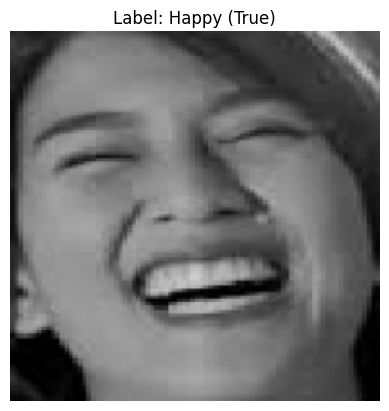

In [ ]:
random = np.random.randint(340)
show_prediction(random)